
A sentiment analysis job about the problems of each major U.S. airline. 

It contains whether the sentiment of the tweets in this data was positive, neutral, or negative for six US airlines. 

Link to dataset: 'https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment'

In [174]:
# load the dataset 
import pandas as pd 
file_path = '/content/drive/MyDrive/NLP dataset /Tweets.csv' 
airline_tweet = pd.read_csv(file_path)

In [175]:
# view all columns 
pd.set_option('display.max_columns', None) 

# first 5 records 
airline_tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### EXPLORATORY DATA ANALYSIS

In [176]:
# shape of dataframe 
print(f'Dataframe"s shape: {airline_tweet.shape}')

# feature names 
print(airline_tweet.columns)

Dataframe"s shape: (14640, 15)
Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [177]:
# NaN values 
airline_tweet.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool

- No null value in 'airline_sentiment' and 'text' which are the needed features for the analysis

In [178]:
airline_tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

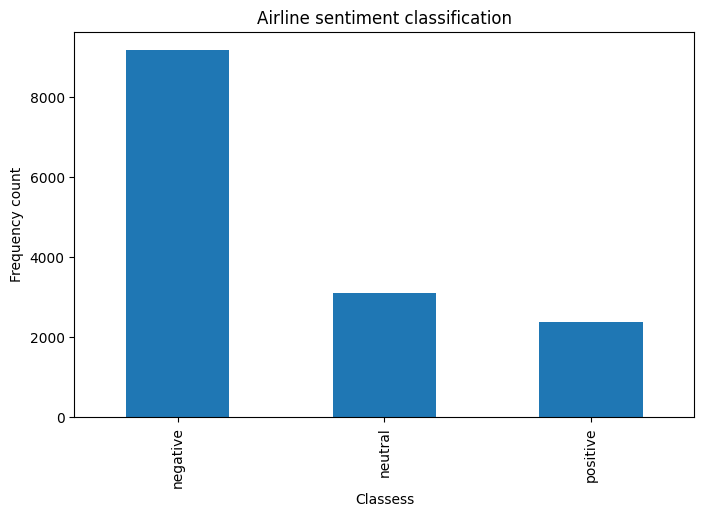

In [179]:
# Airline sentiment distribution 
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
airline_tweet['airline_sentiment'].value_counts().plot.bar() 
plt.title('Airline sentiment classification') 
plt.xlabel('Classess') 
plt.ylabel('Frequency count') 
plt.show()

### EXTRACT THE NEEDED FEATURES

In [180]:
airline_tweet = airline_tweet[['airline_sentiment', 'text']] 
airline_tweet[3900:3905]

,airline_sentiment,text
3900,neutral,@united leisure. Military personnel for safety...
3901,negative,@United ticket counter Masters out of SMF not ...
3902,positive,"@united cool, thanks."
3903,negative,@united my baggage is in shannon now so never ...
3904,negative,"@united if you're listening, why are you the l..."


- The target class is unbalanced

### **TEXT PREPROCESSING** 

- Tokenization 
- Stopwords removal 
- Lemmatization

In [181]:
import nltk 
import re 
nltk.download('stopwords')
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer 
nltk.download('punkt')
nltk.download('wordnet') 
nltk.download('omw-1.4')

# instantiate 
wnl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [182]:
# create and update stop words 
stop_words = set(stopwords.words('english'))
stop_words.update(["united", "americanair", "usairways", "southwestair", "virginamerica", "jetblue"])

In [183]:
# Preprocess text data in DataFrame
airline_tweet['processed_text'] = '' 

for i in range(len(airline_tweet)):
    # Tokenize text into words
    words = nltk.word_tokenize(airline_tweet['text'][i])
    
    # Remove stop words and lemmatize remaining words
    processed_words = [wnl.lemmatize(w.lower()) for w in words if w.lower() not in stop_words]
    
    # Join the processed words back into a single string
    processed_text = ' '.join(processed_words) 
    processed_text = re.sub('[^a-zA-Z]', ' ', processed_text)
    
    # Assign processed text to the corresponding row in DataFrame
    airline_tweet['processed_text'][i] = processed_text

# Print preprocessed DataFrame
airline_tweet.head()

,airline_sentiment,text,processed_text
0,neutral,@VirginAmerica What @dhepburn said.,dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,plus ve added commercial experience tac...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,n t today must mean need take another tr...
3,negative,@VirginAmerica it's really aggressive to blast...,s really aggressive blast obnoxious ente...
4,negative,@VirginAmerica and it's a really big bad thing...,s really big bad thing


### DROP THE ROWS WITH NEUTRAL SENTIMENT

In [184]:
# Remove rows where the sentiment is neutral 
airline_tweet = airline_tweet.drop(airline_tweet[airline_tweet['airline_sentiment'] == 'neutral'].index)

In [185]:
airline_tweet['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

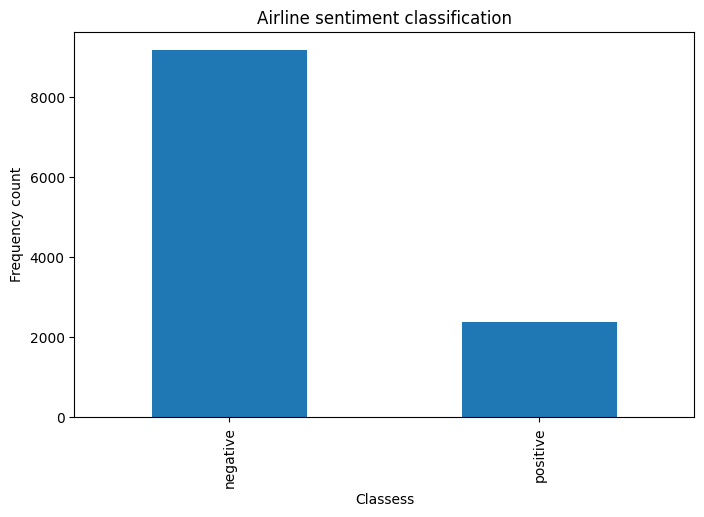

In [186]:
# Airline sentiment distribution 
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
airline_tweet['airline_sentiment'].value_counts().plot.bar()
plt.title('Airline sentiment classification')
plt.xlabel('Classess')
plt.ylabel('Frequency count')
plt.show()

In [221]:
airline_tweet.isnull().sum()

airline_sentiment    0
text                 0
processed_text       0
dtype: int64

**Comparing the original text with the preprocessed text**

In [ ]:
# a sample text
airline_tweet['text'][12000]

'@AmericanAir You Cancelled Flight my flight and there’s no way to rebook on the website or app? I have to wait 35 minutes on hold? #fail cc @Delta'

**Wordcloud for the preprocessed text**

In [ ]:
# import the necessary libraries 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

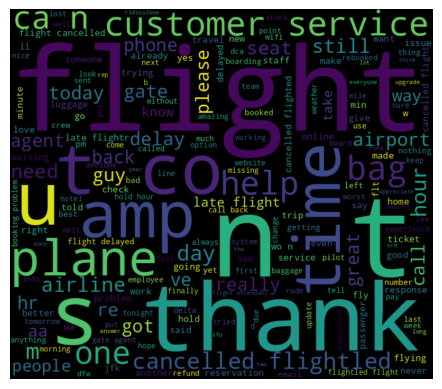

In [212]:
# Create stopword list 

# plt.figure(figsize = (8, 8))

text = " ".join(review for review in airline_tweet['processed_text'])
wordcloud = WordCloud(width=800, height=700, background_color='black').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:

# Positive and negative tweets dataframe
positive = airline_tweet[airline_tweet['airline_sentiment'] == 'positive']
negative = airline_tweet[airline_tweet['airline_sentiment'] == 'negative']

**Positive Reviews Wordcloud**

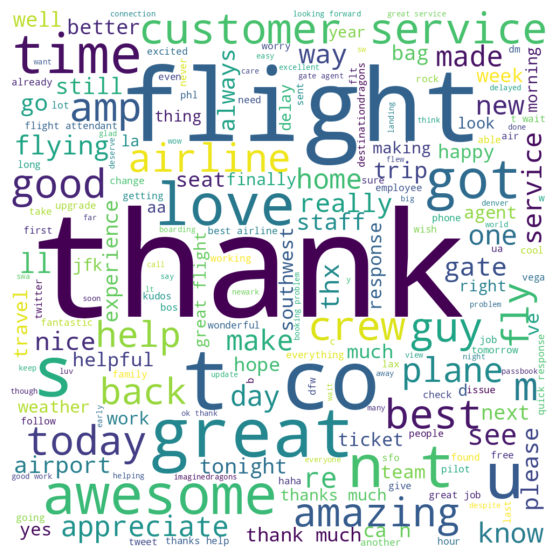

In [217]:
# positive reviews 
plt.figure(figsize = (8, 7)) 
text = " ".join(review for review in positive['processed_text'])
wordcloud = WordCloud(width=800, height=700, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('+ve_reviws.png')
plt.show()

**Negative Reviews Wordcloud**

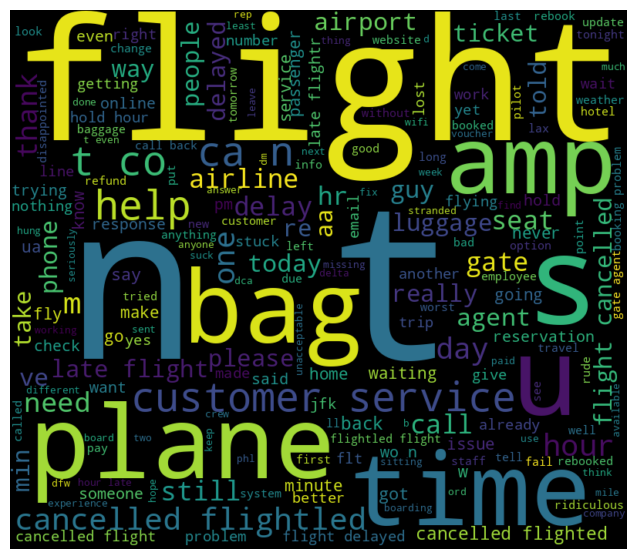

In [ ]:
# negative Reviews 
plt.figure(figsize = (8, 7))
text = " ".join(review for review in negative['processed_text'])
wordcloud = WordCloud(width=800, height=700, background_color='black').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('-ve_reviews.png')
plt.show()

**Airline sentiment mapping with numerical values**

In [ ]:
airline_tweet['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# create dictionary of sentiment with map 
mappings = {'negative':-1, 'positive':1}

In [ ]:
# mapping
airline_tweet['airline_sentiment'] = airline_tweet['airline_sentiment'].map(mappings)
airline_tweet['airline_sentiment'].value_counts()

-1    9178
 1    2363
Name: airline_sentiment, dtype: int64

In [ ]:
y = airline_tweet['airline_sentiment']

**Text Vectorization** 
- TF-IDF

In [187]:
# import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 

# instantiate 
tfidf = TfidfVectorizer(max_features = 4000)

In [191]:
# fit transform 
X = tfidf.fit_transform(airline_tweet['processed_text']).toarray()

X[1200]

array([0., 0., 0., ..., 0., 0., 0.])

In [192]:
# shape
X.shape

(11541, 4000)

- the text data has 4000 features which was the max features set to as an hyperparameter

In [193]:
tfidf.get_feature_names_out()

array(['aa', 'aadv', 'aadvantage', ..., 'zr', 'zurich', 'zy'],
      dtype=object)

**Split the dataset**

In [194]:
# train test split 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [195]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8655, 4000), (2886, 4000), (8655,), (2886,))

In [ ]:
y_test

4794     1
10480   -1
8067    -1
8880     0
8292    -1
        ..
4664    -1
9826    -1
11528   -1
9787    -1
1698     0
Name: airline_sentiment, Length: 3660, dtype: int64

### MODELLING WITH MACHINE LEARNING CLASSIFICATION MODELS

### **Import necessary libraries**

In [196]:
# import module 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
import lightgbm 
from lightgbm import LGBMClassifier

**Modelling: Bernoulli Naive Bayes Model**

In [203]:
# instantiate 
mnb_clf = MultinomialNB()
# predict probability
mnb_clf.fit(X_train, y_train) 

# training accuracy score 
print(mnb_clf.score(X_train, y_train))

# test accuracy score 
print(mnb_clf.score(X_test, y_test))

0.8974003466204507
0.8866943866943867


**Random Forest Classifier**

In [201]:
# instantiate 
rf_clf = RandomForestClassifier()
# predict probability
rf_clf.fit(X_train, y_train)

# training accuracy score 
print(rf_clf.score(X_train, y_train))

# test accuracy score 
print(rf_clf.score(X_test, y_test))

0.9990756787983824
0.8984753984753985


**LightGBM Classifier**

In [197]:
# instantiate 
lgbm_clf = LGBMClassifier()
# predict probability
lgbm_clf.fit(X_train, y_train)

# training accuracy score 
print(lgbm_clf.score(X_train, y_train))

# test accuracy score 
print(lgbm_clf.score(X_test, y_test))

0.9428076256499134
0.8991683991683992


**Catboost Classifier**

- LGBMClassifier and RandomForest Classifier generalized best on the test data among the 3 ML model

### MODEL EVALUATION

In [208]:
# prediction
y_pred = lgbm_clf.predict(X_test)

In [209]:
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix(y_test, y_pred)

array([[2239,   84],
       [ 207,  356]])

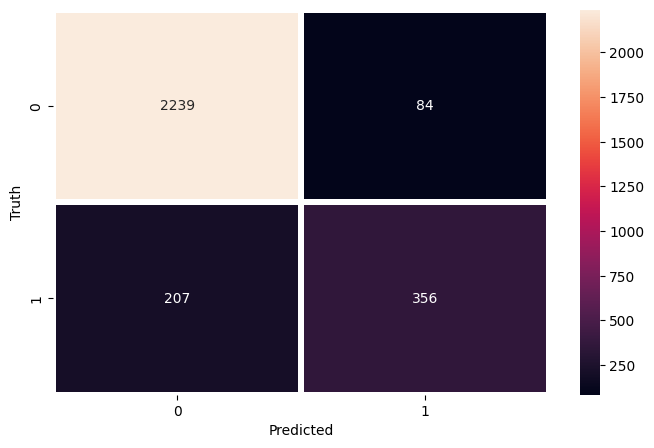

In [220]:
# prettified confusion matrix 

import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, linewidths = 3, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Truth') 
plt.savefig('confusiom_matrix.png')
plt.show()

In [211]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.92      0.96      0.94      2323
           1       0.81      0.63      0.71       563

    accuracy                           0.90      2886
   macro avg       0.86      0.80      0.82      2886
weighted avg       0.89      0.90      0.89      2886

